In [1]:
from transformers import (
    AutoTokenizer, 
    AutoModelForCausalLM,
    VisionEncoderDecoderModel, 
    ViTFeatureExtractor, 
    PreTrainedTokenizerFast,)
import torch
import pandas as pd
from PIL import Image
import os
from konlpy.tag import Okt
from collections import Counter

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
caption_model_name = "ddobokki/vision-encoder-decoder-vit-gpt2-coco-ko"
feature_extractor = ViTFeatureExtractor.from_pretrained(caption_model_name)
caption_tokenizer = PreTrainedTokenizerFast.from_pretrained(caption_model_name)
caption_model = VisionEncoderDecoderModel.from_pretrained(caption_model_name)
caption_model.eval()
caption_model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out

In [4]:
gen_model_dir = './model'
gen_tokenizer = AutoTokenizer.from_pretrained(gen_model_dir)
gen_model = AutoModelForCausalLM.from_pretrained(gen_model_dir)
gen_model.eval()
gen_model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(51202, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )


In [5]:
emo_start = '<e>'
emo_end = '</e>'

In [6]:
def img_to_caption(img_src):
    image = Image.open(img_src).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
    generated_ids = caption_model.generate(pixel_values.to(device),num_beams = 5)
    generated_text = caption_tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    return generated_text[0]

In [7]:
folder_name = './test_img'
file_names = os.listdir(folder_name)
okt = Okt()

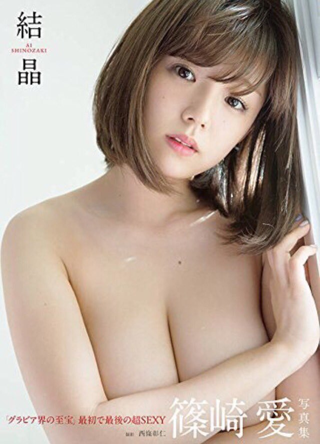

<e>머리, 여자, 그녀</e>
머리카락 한 올 한올
그녀의 머리칼을 쓰다듬는다
그녀가 웃고있을때
여자의 입꼬리가 올라가고
머리카락 하나가 올라간다
그녀도 같이 웃어보인다
여자가 웃을 때
머리칼이



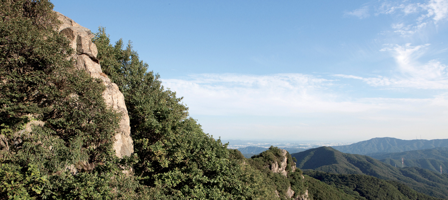

<e>산, 꼭대기, 경치</e>
산 꼭대기
경치 좋다네
아름다움도 그렇다네.
산 꼭대기엔
하늘이 있고
산이 있다네 ... 
그런데
어째서
그 아래엔 산이 있나
그 아래에 있는 산은
왜



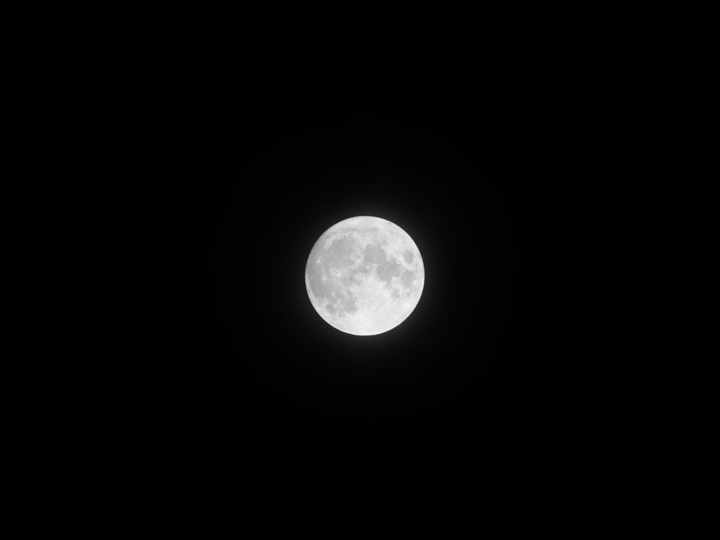

<e>어, 두운, 배경</e>
어두운 배경
어두운 배경 속
아무것도 들리지 않는
그런 배경 속에서
나는 무엇을 찾고
무엇을 찾아 헤메이며
헤메이던가
이리저리 헤매이던
내 모습들
모두 잊고
잊혀



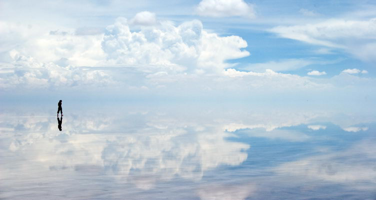

<e>하늘, 높이, 날</e>
하늘높이 날고 싶다
날고 싶은데
하늘높이 날아갈 수 없는
나약한 나를
부끄럽게 여긴다
하늘 높이 날기 위해
날아가야 한다
저 멀리서 보면
너무 멀리서
보이지 않는
내
마음



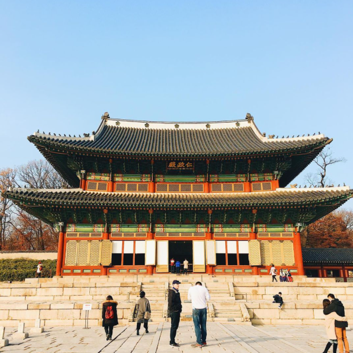

<e>건물, 앞, 무리</e>
빌딩 앞
무리 지어 사는 사람들
어디로 가는 걸까
이리저리 헤매다 보면
아무것도 보이지 않는
텅 빈 골동품들
모두 다 어디로 갔는지
생각나지 않는다
어느 날 문득 뒤를 돌아봤을 때



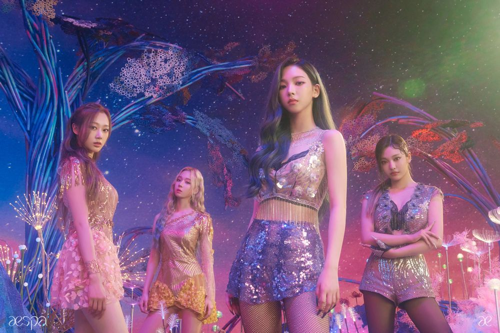

<e>무리, 여자, 무대</e>
무리와 여자
여자는 무대 위에서 춤추고
남자는 조명 아래서 춤을 춘다
무리와 남자
무대 위의 모든 것들
그 중 하나일까
아니면 다른 하나인 걸까 ...?
여자와 남자 ᅳ
세상의 모든



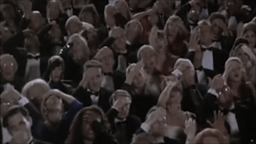

<e>무리, 사람, 서로</e>
무리는
사람들끼리
서로에게
힘을
주고
나도
서로를
위해서
행복하게
살아가야 한다
그런데
사람들은
무리를
사랑하지
않는다
그래서
그들은
자신의
마음을




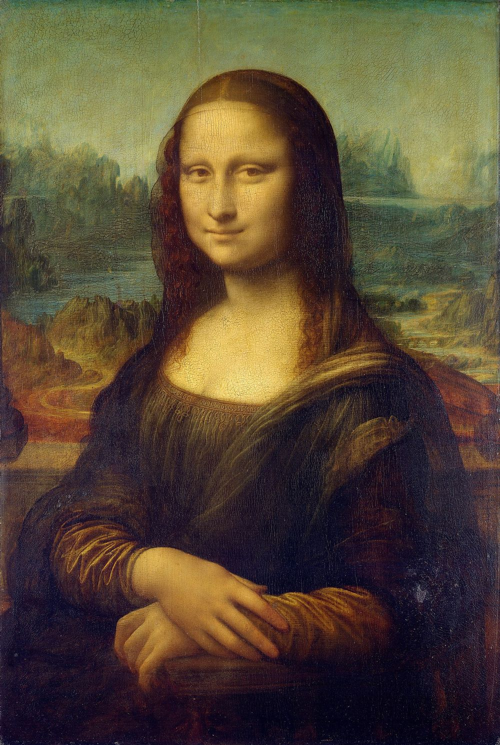

<e>드레스, 여자, 그림</e>
여자들의 드레스
여자들의 그림자는 아름답다
여자의 눈동자는 아름다운데
남자의 눈은 아름답지 않다
남녀의 시선은 아름답지만
그들의 눈빛은 아름답다
드레스를 입으면
아름답지 않을까
그래서



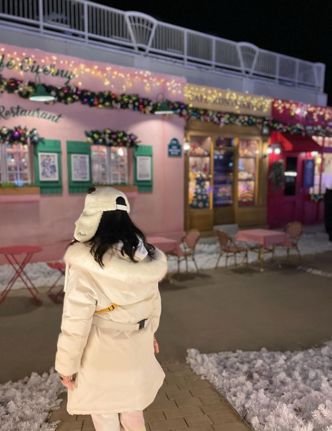

<e>크리스마스, 장식, 건물</e>
크리스마스
크리스마스를 장식하고
건물들을 빛나게 하는
그런 건물 하나
모두 모이고 모여
하나가 되었다
크레파스로 가려진
이름모를 꽃 한송이가
하늘을 수놓으며
나에게



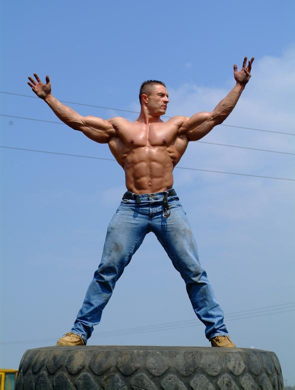

<e>바위, 위, 남자</e>
바위 위의 남자
바위 위의 여자
바위가 되고 싶다
바위 위에 서서
바위를 꿈꾸고 싶다 ... 
바위에 앉아
눈물을 흘리며
가슴을 부여잡고
또 울음을 터트리고
울음을 그칠 수 있는




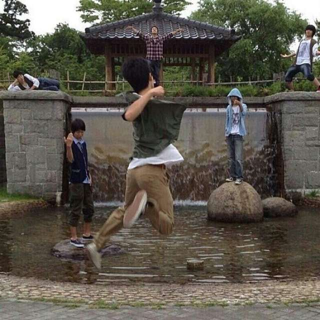

<e>수영, 팬츠, 소녀</e>
수영장
소녀여!
팬츠 입은 소녀가
수영장에 갔다 왔다네
그런데 수영복이 너무 예뻐서
수영복을 입었더니
소녀가 물속으로 뛰어들었네.
소녀는 물살에 휩쓸려
물속으로 들어가버렸네



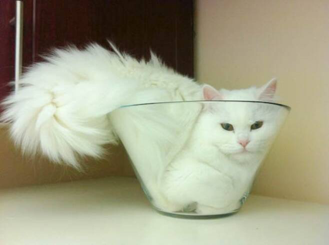

<e>고양이, 사발, 안</e>
고양이 사발
고양이는 안 먹어도 돼요
먹을 걸 그랬어요 고양이가
먹이를 줬어요
사발 안에 고양이 있잖아요
그럼 고양이는 사발을 먹었겠죠
사발은 안 먹어도 돼요 고양이
안 먹



In [13]:
for file_name in file_names:
    img_src = os.path.join(folder_name, file_name)
    input_image = Image.open(img_src).convert("RGB")
    width, height = input_image.size
    input_image = input_image.resize((width // 2, height //2))
    input_image.show()
    caption = img_to_caption(img_src)
    noun = okt.nouns(caption)
    count = Counter(noun)
    noun_list = count.most_common(3)
    rtn_noun = list(map(lambda x: x[0],noun_list))
    tag = ', '.join(rtn_noun)
    input_text = emo_start + tag + emo_end
    input_ids = gen_tokenizer.encode(input_text, return_tensors="pt").to(device)
    #gen_ids = gen_model.generate(input_ids,max_length=128,repetition_penalty=2.0,do_sample=True,top_k=30,top_p=0.75)
    gen_ids = gen_model.generate(input_ids,max_length=64,num_beams=5,no_repeat_ngram_size=2)
    generated = gen_tokenizer.decode(gen_ids[0,:].tolist(),skip_special_tokens=True)
    print(input_text)
    print(generated[len(tag)+1:])
    print()

    # for emotion in emotions:
    #     caption = img_to_caption(img_src)
    #     print(caption)
    #     break
        # input_text = emo_start + emotion + emo_end + caption
        # input_ids = gen_tokenizer.encode(input_text, return_tensors="pt").to(device)
        # gen_ids = gen_model.generate(input_ids,max_length=128,repetition_penalty=2.0,do_sample=True,top_k=30,top_p=0.95,)
        # generated = gen_tokenizer.decode(gen_ids[0,:].tolist())
        # print(generated)
        # print()

In [36]:
emo_idx = 5
index = 27
caption = caption_df['pred'][index]
input_text = emo_start + emotions[emo_idx] + emo_end + caption
#input_text = emo_start + emotions[emo_idx] + emo_end + '흐린 날 바다 새'

In [37]:
input_ids = tokenizer.encode(input_text, return_tensors="pt").to(device)
gen_ids = model.generate(input_ids,max_length=128,repetition_penalty=2.0,
        do_sample=True,
        top_k=30,
        top_p=0.95,
    )
generated = tokenizer.decode(gen_ids[0,:].tolist())

In [38]:
Image.open('../'+caption_df['img_path'][index]).convert('RGB').show()
print(generated)

<e> 상처</e> 흐린 날 바다 새가 울고,
날개 잃은 바람은 휘파람 부고
내 눈물은 하염없이 흘러나왔다.
물결 따라 흔들리는 모래알,
이따금 파도 소리 들리는 곳.
수많은 빛들이 모여들던 장소와 같은 공간...  그리고 그 사이 어딘가.<pad><pad> 또르르. 흘러 내리는 물결, 수북히 쌓여 가는 내 눈물 위로 스며든다.
언젠가는 사라져 버릴 것만 같았던 것들이 흔적조차 없을 뿐인 것 만으로도
눈 앞의 풍경처럼 스쳐지나간다. 사라지는 것들은 아름답지만, 그것들을 기억하는 이들 또한 아름다워지니-
그런
